In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

# CSV File read

In [4]:
df = pd.read_csv('Dhaka Rent.csv')
df.head()

,Area,Rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [6]:
df.tail()

,Area,Rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    60 non-null     int64
 1   Rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [8]:
df.isnull().sum()

Area    0
Rent    0
dtype: int64

In [10]:
#df.area
df[['Area']].head() #DEAFAULT 5 ITEAMS

,Area
0,2000
1,2100
2,2500
3,2250
4,3000


In [12]:
df.head(4)

,Area,Rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100


In [13]:
df.tail(4)

,Area,Rent
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [11]:
#df.area
df[['Area']].tail() #DEAFAULT 5 ITEAMS

,Area
55,3100
56,2750
57,1800
58,2200
59,3100


In [14]:
df.shape # row, col

(60, 2)

In [15]:
df.corr()

,Area,Rent
Area,1.000000,0.974807
Rent,0.974807,1.000000


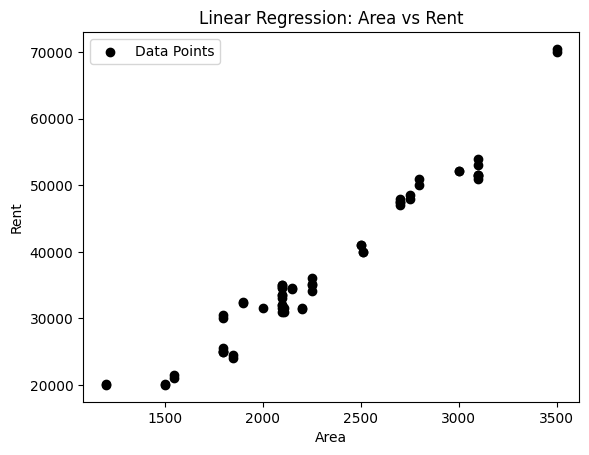

In [7]:
plt.scatter(df.Area, df.Rent, marker='o', color='black', label='Data Points')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Linear Regression: Area vs Rent')
plt.legend()  

In [19]:
df.Area.mean()

2289.0

In [20]:
df.Rent.mean()

37269.166666666664

In [21]:
df.head()

,Area,Rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [14]:
x = df.drop('Rent', axis=1) #shift+tab
x.head()

,Area
0,2000
1,2100
2,2500
3,2250
4,3000


In [15]:
y = df.drop('Area', axis=1) # axis='columns'/1
y.head()

,Rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [25]:
X = df[['Area']]
X.head()

,Area
0,2000
1,2100
2,2500
3,2250
4,3000


In [16]:
y = df[['Rent']]
y.head()

,Rent
0,31500
1,35000
2,41050
3,36100
4,52100


# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [17]:
reg.fit(x,y) #training

LinearRegression()

In [18]:
reg.coef_    # m

array([[21.29266147]])

In [19]:
reg.intercept_     # c

array([-11469.73544643])

In [20]:
reg.predict([[2000]])

array([[31115.58750079]])

In [21]:
# y = mx+c
(reg.coef_  * 2000) + (reg.intercept_)

array([[31115.58750079]])

# Residuals

In [22]:
df['residuals'] = df[['Rent']] - reg.predict(x) # Actual - Predicted
df.head()

,Area,Rent,residuals
0,2000,31500,384.412499
1,2100,35000,1755.146352
2,2500,41050,-711.918238
3,2250,36100,-338.752869
4,3000,52100,-308.248974


In [36]:
df['predict'] = reg.predict(x) 
df.head()

,Area,Rent,residuals,predict
0,2000,31500,384.412499,31115.587501
1,2100,35000,1755.146352,33244.853648
2,2500,41050,-711.918238,41761.918238
3,2250,36100,-338.752869,36438.752869
4,3000,52100,-308.248974,52408.248974


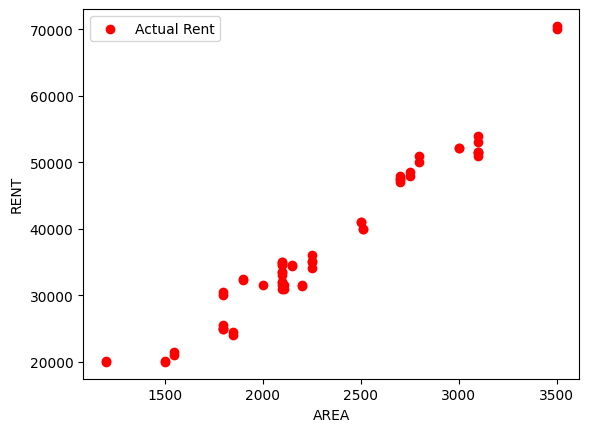

In [53]:
plt.scatter(df.Area, df.Rent, marker='o', color='red', label='Actual Rent') 
plt.xlabel('AREA')
plt.ylabel('RENT')

plt.xlabel('AREA')
plt.ylabel('RENT')
plt.legend() 
plt.show()

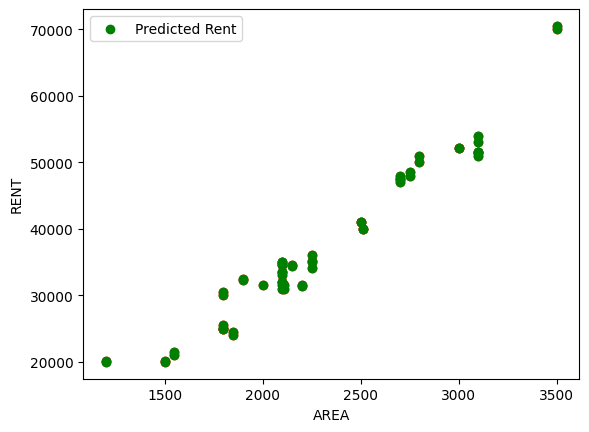

In [55]:
plt.scatter(df.Area , df.Rent, marker='o', color='red') # original area and rent
plt.scatter(df.Area, df.Rent, marker='o', color='green', label='Predicted Rent')
plt.xlabel('AREA')
plt.ylabel('RENT')


plt.xlabel('AREA')
plt.ylabel('RENT')
plt.legend() 
plt.show()

In [56]:
plt.scatter(df.Area , df.Rentent, marker='o', color='red')
plt.plot(df.area, df.predict)
plt.xlabel('AREA')
plt.ylabel('RENT')

AttributeError: 'DataFrame' object has no attribute 'Rentent'

In [ ]:
reg.predict([[3000]])

# Cost Function: MSE, MAE, RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(df['rent'] , df['predict'])
mse

In [ ]:
mean_absolute_error(df['rent'] , df['predict'])

In [ ]:
import math 
math.sqrt(mse) #RMSE

# Accuracy check

In [ ]:
reg.score(x,y)

# Train, Test, Split

In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
xtrain,  xtest, ytrain, ytest = tts(x, y)

In [29]:
len(xtrain)

45

In [30]:
len(xtest)

15

In [31]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.30, random_state=1)

In [32]:
xtrain.head()

,Area
52,3500
19,2700
42,2100
56,2750
17,1550


In [33]:
ytrain.head()

,Rent
52,70500
19,47000
42,34700
56,48500
17,21000


In [34]:
reg.fit(xtrain, ytrain) #train data

LinearRegression()

In [35]:
reg.score(xtest, ytest) #test accuracy for unknown data

0.9174928490312289

In [36]:
reg.score(xtrain, ytrain) #training accuracy

0.9515633925067879

# Tarin, Test, Validations

In [37]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.40, random_state=1)

In [38]:
xtrain.shape

(36, 1)

In [39]:
xtest.shape

(24, 1)

In [40]:
xtest, xval, ytest, yval = tts(xtest, ytest, test_size=.50, random_state=1)

In [41]:
xtest.shape

(12, 1)

In [42]:
xval.shape

(12, 1)

# r2_score

In [43]:
from sklearn.metrics import r2_score
r2_score(ytest, reg.predict(xtest)) #actual y and predicted y / predicted_y = reg.predict(xtest)

0.9054137544427708